In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\ronak\\Python Programming Course Udemy'

In [4]:
movies=pd.read_csv('Movie-Ratings.csv')

In [6]:
len(movies)

559

In [7]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [8]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [11]:
movies.columns=['Film', 'Genre', 'CriticRating', 'AudienceRating',
       'BudgetMillion', 'Year']

In [12]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,BudgetMillion,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [15]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillion,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0
Year,559.0,2009.152057,1.362632,2007.0,2008.0,2009.0,2010.0,2011.0


In [17]:
movies.Film = movies.Film.astype('category')

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null int64
dtypes: category(1), int64(4), object(1)
memory usage: 47.4+ KB


In [20]:
movies.Year = movies.Year.astype('category')
movies.Genre = movies.Genre.astype('category')

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillion     559 non-null int64
Year              559 non-null category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [23]:
#Get unique values of the category variable
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [25]:
# Categorical variables not included in describe method output
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CriticRating,559.0,47.309481,26.413091,0.0,25.0,46.0,70.0,97.0
AudienceRating,559.0,58.744186,16.826887,0.0,47.0,58.0,72.0,96.0
BudgetMillion,559.0,50.236136,48.731817,0.0,20.0,35.0,65.0,300.0


In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [28]:
############ JOINT PLOT #######

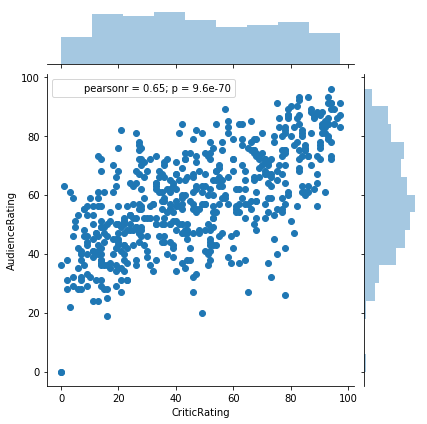

In [33]:
j = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating')

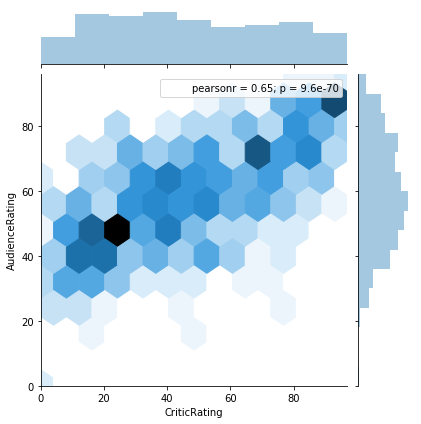

In [35]:
### CHART 1
j = sns.jointplot(data=movies,x='CriticRating',y='AudienceRating',kind='hex')

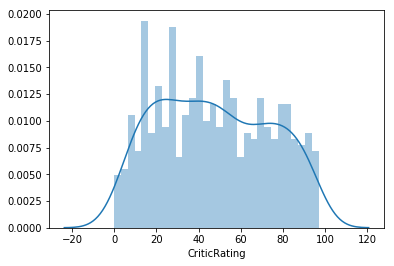

In [36]:
# HISTOGRAM - Probability Distribution funciton
histo = sns.distplot(movies.CriticRating,bins=30)

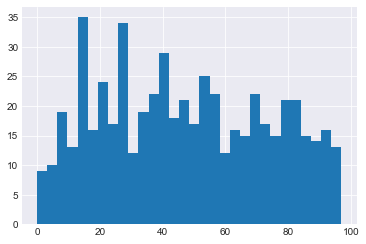

In [40]:
# CHART 2
sns.set_style(style='darkgrid')
n1 = plt.hist(movies.CriticRating, bins=30)

---

In [ ]:
# CHART 3 - Stacked Histogram

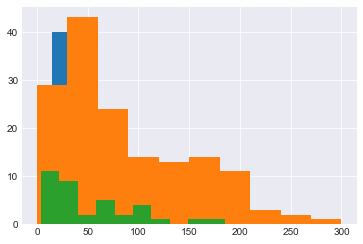

In [47]:

plt.hist(movies[movies.Genre == 'Drama'].BudgetMillion)
plt.hist(movies[movies.Genre == 'Action'].BudgetMillion)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillion)
plt.show()

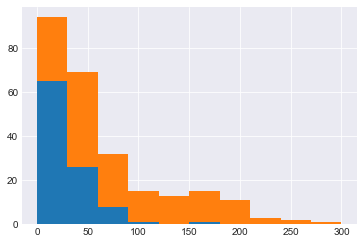

In [49]:
plt.hist([movies[movies.Genre == 'Drama'].BudgetMillion,movies[movies.Genre == 'Action'].BudgetMillion],stacked=True )
plt.show()

In [50]:
for gen in movies.Genre.cat.categories:
    print(gen)

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


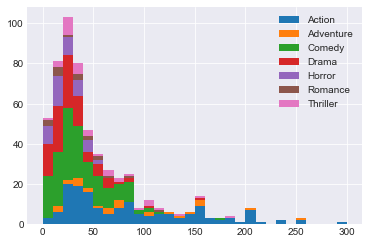

In [57]:
movieGenre=[]
myLabels = []
for gen in movies.Genre.cat.categories:
    movieGenre.append(movies[movies.Genre == gen].BudgetMillion)
    myLabels.append(gen)
plt.hist(movieGenre, stacked=True, bins=30,rwidth=1, label=myLabels)
plt.legend()
plt.show()

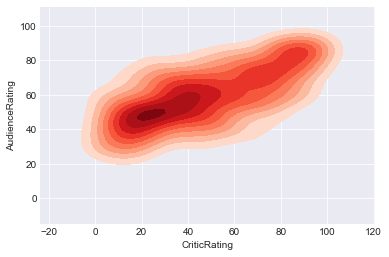

In [64]:
# Chart 4
# KDE Kernel Density Estimate
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest=False, cmap='Reds')

[(-20, 160)]

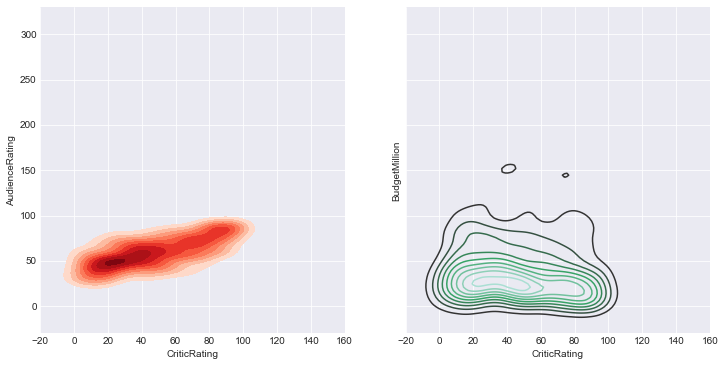

In [70]:
# Chart 5
# Working with subplot
f, axes = plt.subplots(1,2,figsize=(12,6),sharex=True, sharey=True) 
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade = True, shade_lowest=False, cmap='Reds', ax=axes[0])
k2 = sns.kdeplot(movies.CriticRating, movies.BudgetMillion, ax=axes[1])
k1.set(xlim=(-20,160))

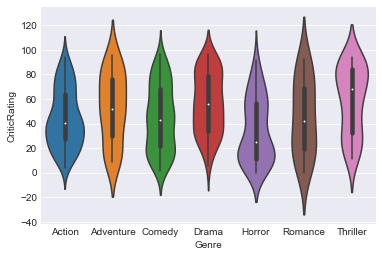

In [72]:
# ViolinPlots
vio = sns.violinplot(data=movies,x='Genre',y='CriticRating')

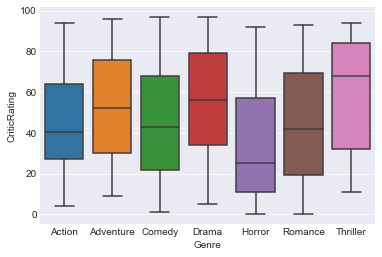

In [73]:
b = sns.boxplot(data=movies,x='Genre',y='CriticRating')

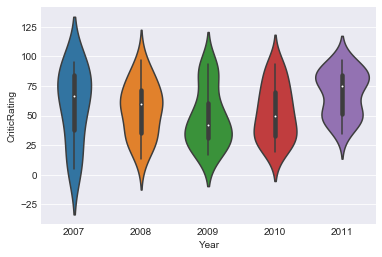

In [74]:
# violin plot gives more insight than the box plot
vio = sns.violinplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

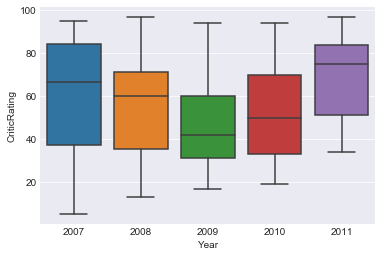

In [75]:
vio = sns.boxplot(data=movies[movies.Genre=='Drama'],x='Year',y='CriticRating')

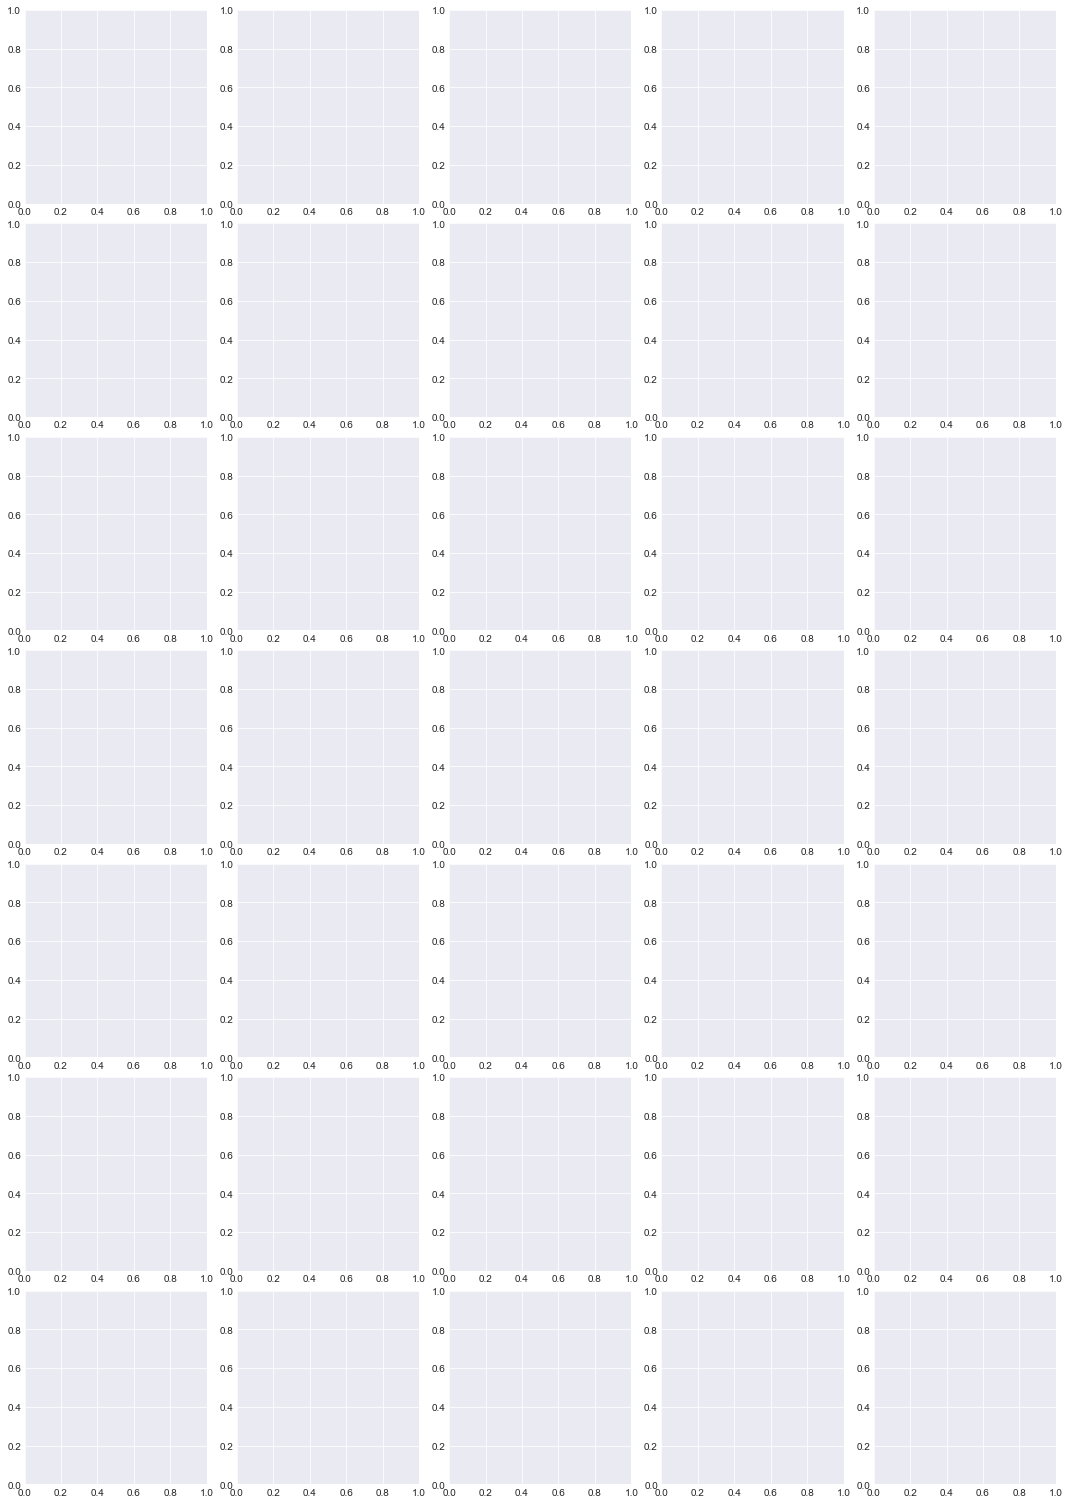

In [80]:
# Facit Grid for the plots
g = sns.FacetGrid(movies,row='Genre',col='Year', hue='Genre')

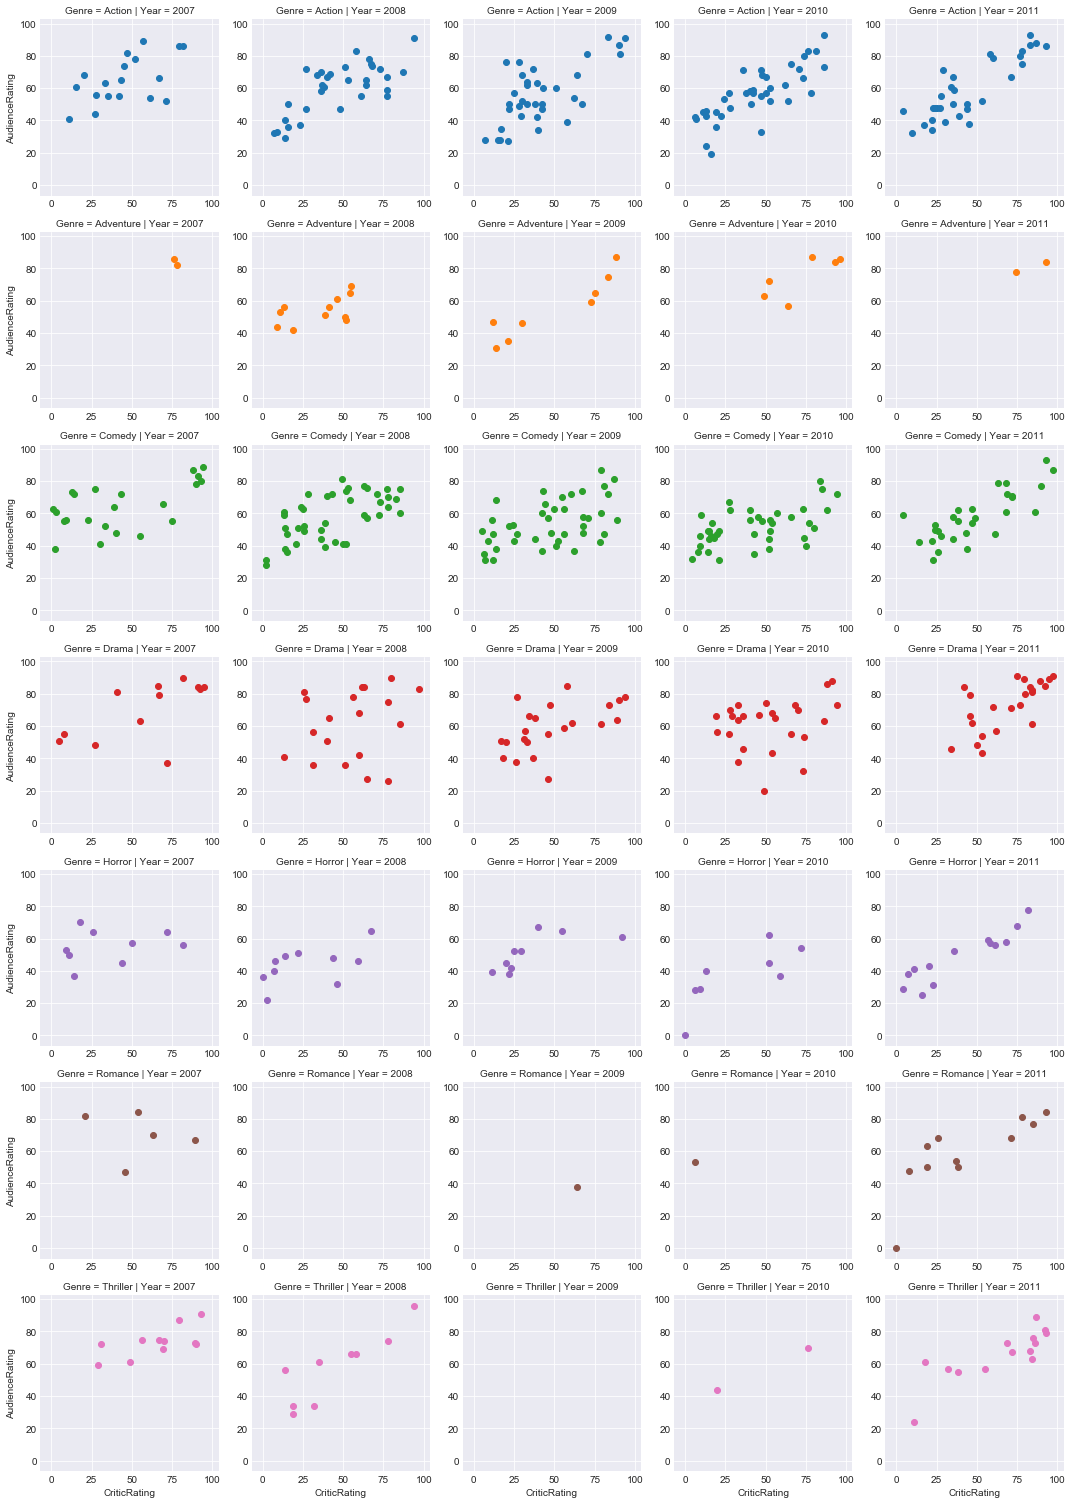

In [81]:
g = sns.FacetGrid(movies,row='Genre',col='Year', hue='Genre')
g = g.map(plt.scatter,'CriticRating','AudienceRating')

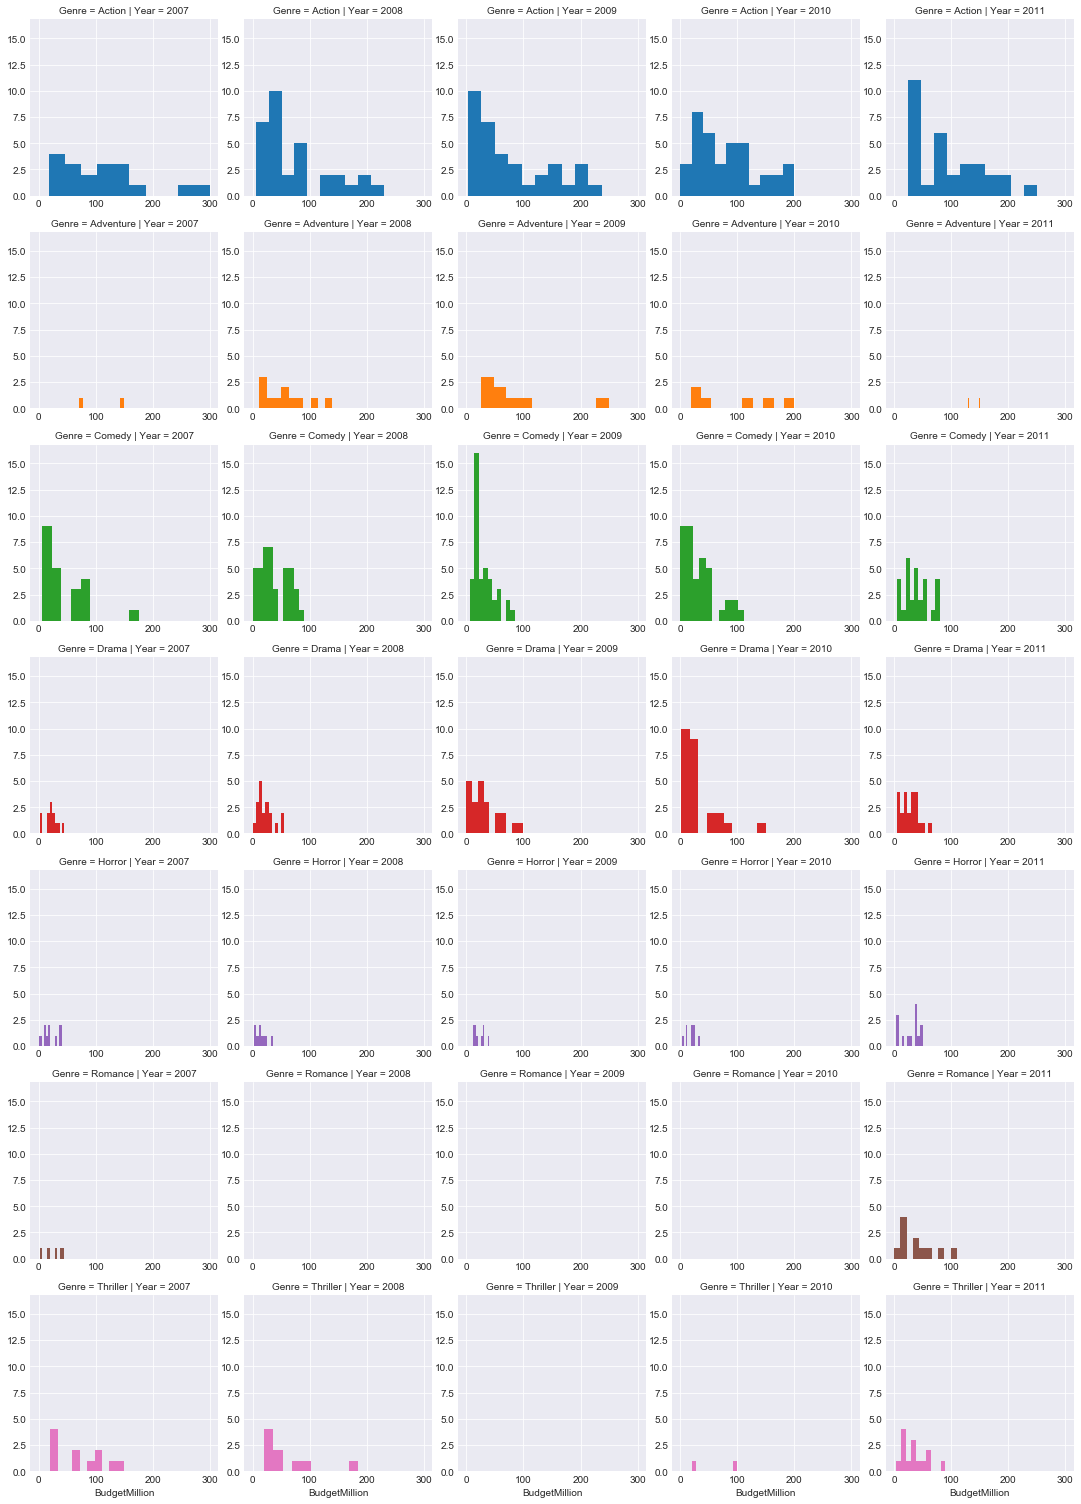

In [82]:
g = sns.FacetGrid(movies,row='Genre',col='Year', hue='Genre')
g = g.map(plt.hist,'BudgetMillion')

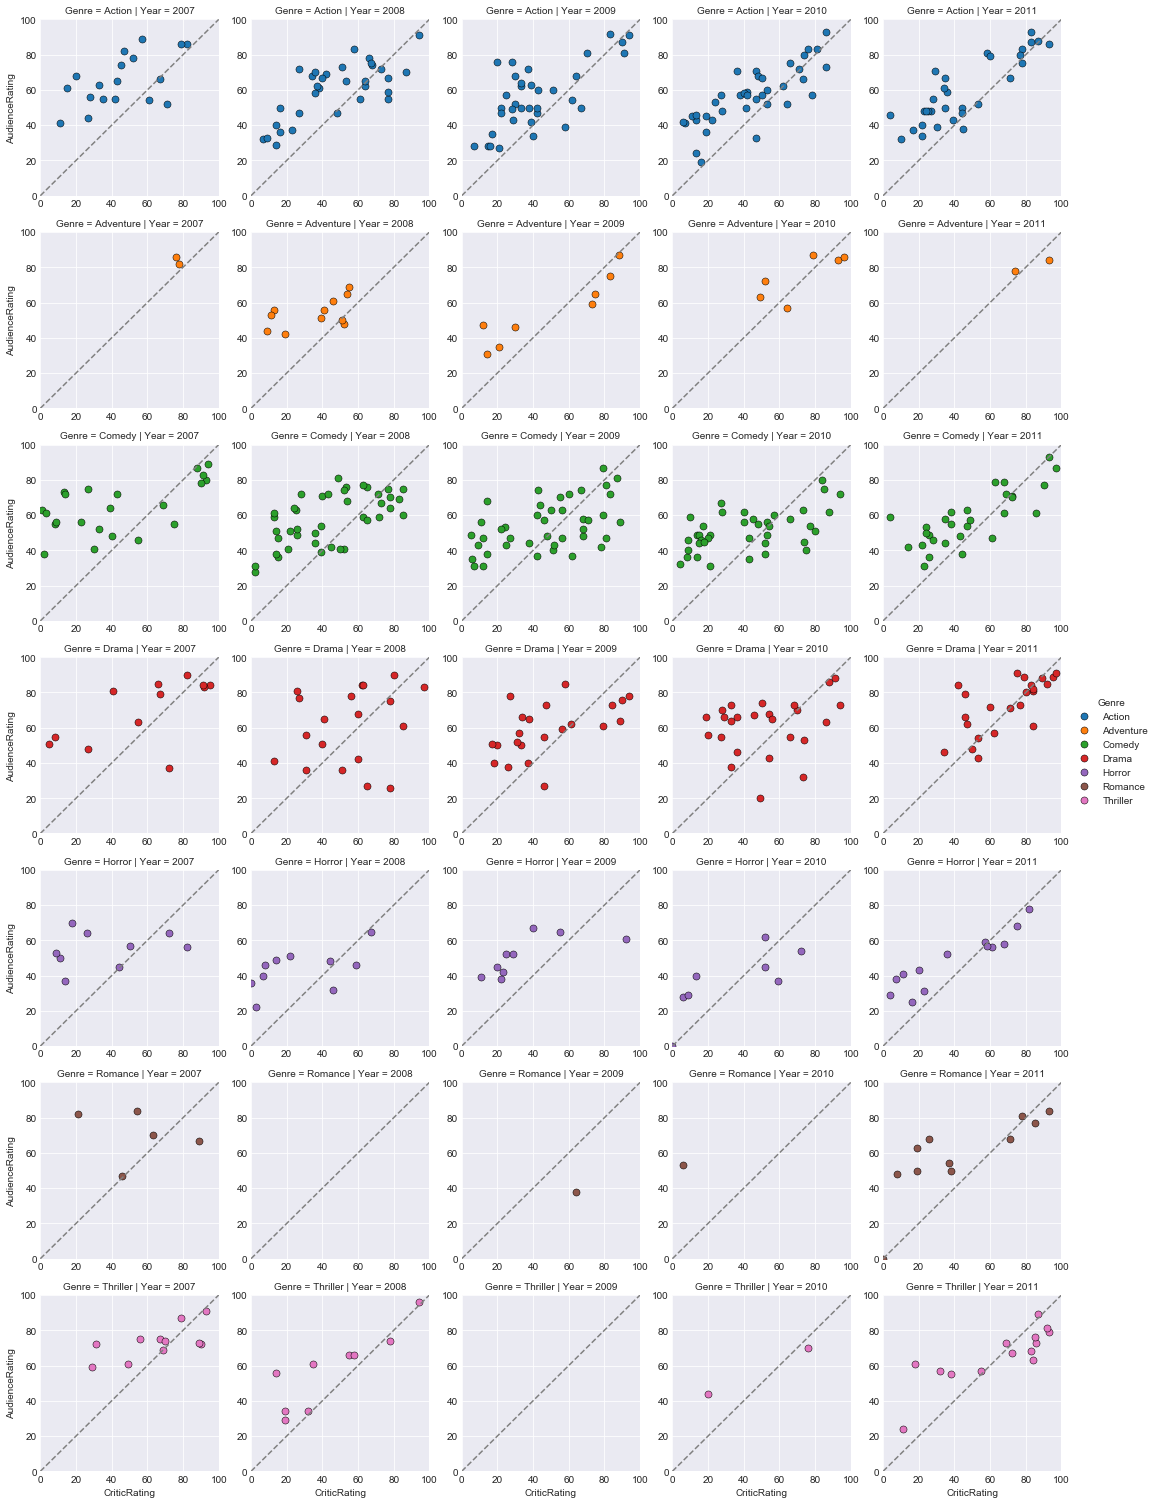

In [86]:
# controlling Axes and Adding Diagonals in FacetGrid plots

g = sns.FacetGrid(movies,row='Genre',col='Year', hue='Genre')
kws = dict(s=50,linewidth=0.5,edgecolor='black')
g = g.map(plt.scatter,'CriticRating','AudienceRating', **kws)
g.set(xlim=(0,100),ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100),c='gray', ls="--")
g.add_legend()

In [91]:
# Challenge
import pandas as pd
movie_data = pd.read_csv('Section6-Homework-Data.csv',encoding='latin1')

In [93]:
movie_data.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [100]:
movie_data.Genre = movie_data.Genre.astype('category')

In [106]:
movie_data.Genre.cat.categories

Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'horror', 'musical', 'mystery',
       'romance', 'sci-fi', 'thriller'],
      dtype='object')

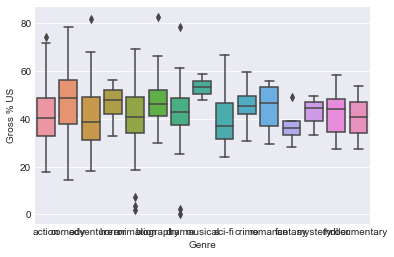

In [96]:
b = sns.boxplot(data=movie_data,x='Genre',y='Gross % US')

In [ ]:
GenreList= ['action','comedy','adventure','animation','drama']
list1=[]
for gen in GenreList:
list1.append(movie_data[movie_data.Genre==gen])
    